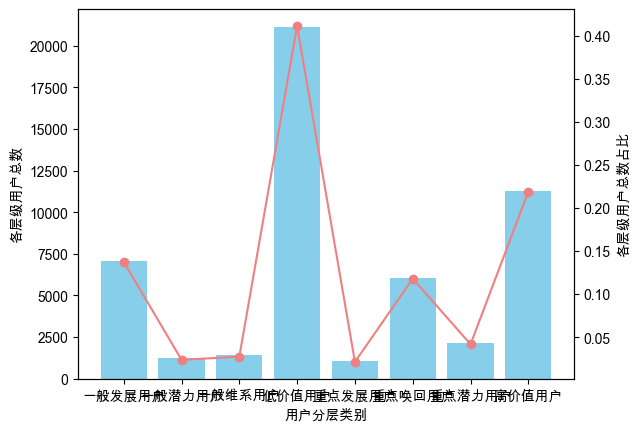

In [1]:
import pandas as pd 

df = pd.read_csv("user_info.csv")
df["last_order_date"] = pd.to_datetime(df["last_order_date"])

from datetime import datetime

endTime = datetime(2019,4,1)

df["time_gap"] = endTime - df["last_order_date"]

df["time_gap"] = df["time_gap"].dt.days

df["R"] = pd.qcut(df["time_gap"],q=5,labels=[5,4,3,2,1])

df["F"] = pd.qcut(df["order_count"],q=5,labels=[1,2,3,4,5])

df["M"] = pd.qcut(df["total_amount"],q=5,labels=[1,2,3,4,5])

def rfmTrans(x):
    if x>3:
        return 1
    else:
        return 0

df["R"] = df["R"].apply(rfmTrans)
df["F"] = df["F"].apply(rfmTrans)
df["M"] = df["M"].apply(rfmTrans)

df["mark"] = df["R"].astype(str)+df["F"].astype(str)+df["M"].astype(str)


def rfmType(x):
    if x=="111":
        return "高价值用户"
    elif x=="101":
        return "重点发展用户"
    elif x=="011":
        return "重点唤回用户"
    elif x=="001":
        return "重点潜力用户"
    elif x=="110":
        return "一般潜力用户"
    elif x=="100":
        return "一般发展用户"
    elif x=="010":
        return "一般维系用户"
    else:
        return "低价值用户"


df["customer_type"] = df["mark"].apply(rfmType)

df_type = df["customer_type"].groupby(df["customer_type"]).count()

total_user = df_type.values

df_perc = df_type/51394

import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "Arial Unicode MS"

plt.bar(df_type.index,df_type.values,color="skyblue")

plt.xlabel("用户分层类别")

plt.ylabel("各层级用户总数")

plt.twinx()

plt.plot(df_perc.index,df_perc.values,marker="o",color="lightcoral")

plt.xlabel("用户分层类别")

plt.ylabel("各层级用户总数占比")

plt.show()